In [25]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [1]:

X_dict = [{'interest': 'tech', 'occupation': 'professional'},
          {'interest': 'fashion', 'occupation': 'student'},
          {'interest': 'fashion', 'occupation': 'professional'},
          {'interest': 'sports', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'student'},
          {'interest': 'tech', 'occupation': 'retired'},
          {'interest': 'sports', 'occupation': 'professional'}]

In [3]:
one_hot = DictVectorizer(sparse = False)
X_encoded  = one_hot.fit_transform(X_dict)
print(X_encoded)

[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [4]:
one_hot.vocabulary_

{'interest=tech': 2,
 'occupation=professional': 3,
 'interest=fashion': 0,
 'occupation=student': 5,
 'interest=sports': 1,
 'occupation=retired': 4}

In [5]:
one_hot.inverse_transform(X_encoded)

[{'interest=tech': 1.0, 'occupation=professional': 1.0},
 {'interest=fashion': 1.0, 'occupation=student': 1.0},
 {'interest=fashion': 1.0, 'occupation=professional': 1.0},
 {'interest=sports': 1.0, 'occupation=student': 1.0},
 {'interest=tech': 1.0, 'occupation=student': 1.0},
 {'interest=tech': 1.0, 'occupation=retired': 1.0},
 {'interest=sports': 1.0, 'occupation=professional': 1.0}]

In [7]:
X_str = np.array([['tech', 'professional'],
                  ['fashion', 'student'],
                  ['fashion', 'professional'],
                  ['sports', 'student'],
                  ['tech', 'student'],
                  ['tech', 'retired'],
                  ['sports', 'professional']])

In [16]:
le = LabelEncoder()
X_le = np.zeros(shape = X_str.shape)
for i in range(X_str.shape[1]):
    X_le[:,i] = LabelEncoder().fit_transform(X_str[:,i])
 

In [17]:
X_le

array([[2., 0.],
       [0., 2.],
       [0., 0.],
       [1., 2.],
       [2., 2.],
       [2., 1.],
       [1., 0.]])

In [21]:
#one hot 
one_hot = OneHotEncoder(sparse = False)
X_oh = one_hot.fit_transform(X_le)
X_oh

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [22]:
#the problems arises when we have new data which has an unseen column, in case of dict vectorizer it is handled, 
#but not in one hot encoding, hence, we will convert our data into dict type and use dict verctorizer

In [23]:
def string_to_dict(columns, data_str):
    data_dict = []
    for sample_str in data_str:
        data_dict.append({column: value for column, value in zip(columns, sample_str)})
    return data_dict

## Sigmoid

In [24]:
def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

Text(0, 0.5, 'sigmoid(x)')

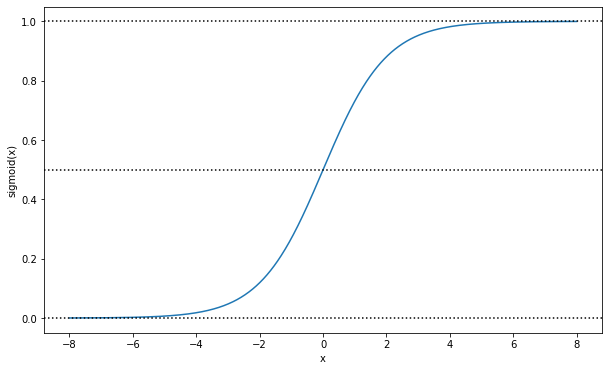

In [31]:
plt.figure(figsize = (10,6))
x = np.linspace(-8,8,1000)
y = sigmoid(x)
plt.plot(x,y)
plt.axhline(y = 0,ls = 'dotted',color = 'k')
plt.axhline(y = 0.5,ls = 'dotted',color = 'k')
plt.axhline(y = 1,ls = 'dotted',color = 'k')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')